<a href="https://colab.research.google.com/github/petercloud23/Equipe_DataScience_SENAI_Out25/blob/main/dataScience3_Matplotlib_Pyplot_DadosExternos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV simulado criado: notas_alunos.csv

    aluno  prova1  prova2  prova3
0     Ana     7.5     8.0     9.0
1    João     6.0     5.5     7.0
2   Maria     9.0     8.5    10.0
3  Carlos     8.0     7.0     6.5
4   Paula     7.0     9.5     8.0 

Com médias calculadas:
     aluno  prova1  prova2  prova3     media
0     Ana     7.5     8.0     9.0  8.166667
1    João     6.0     5.5     7.0  6.166667
2   Maria     9.0     8.5    10.0  9.166667
3  Carlos     8.0     7.0     6.5  7.166667
4   Paula     7.0     9.5     8.0  8.166667 



/tmp/ipython-input-3313825912.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["prova1"], df["prova2"], df["prova3"]], labels=["Prova 1", "Prova 2", "Prova 3"])


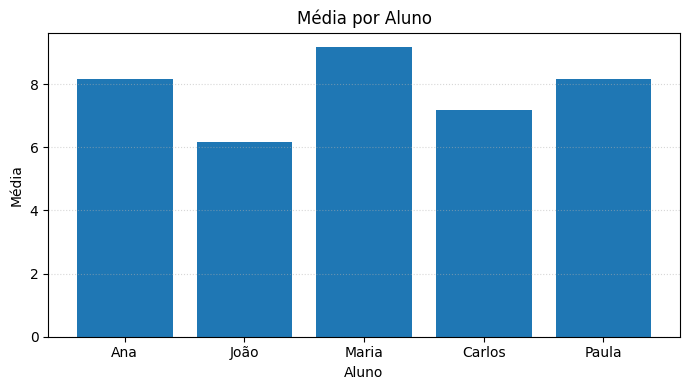

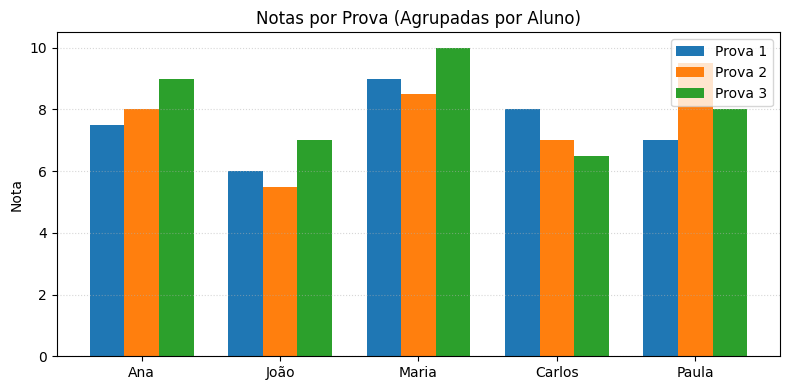

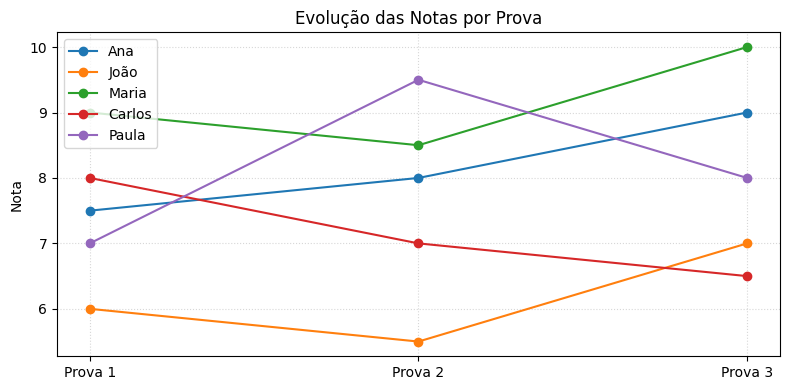

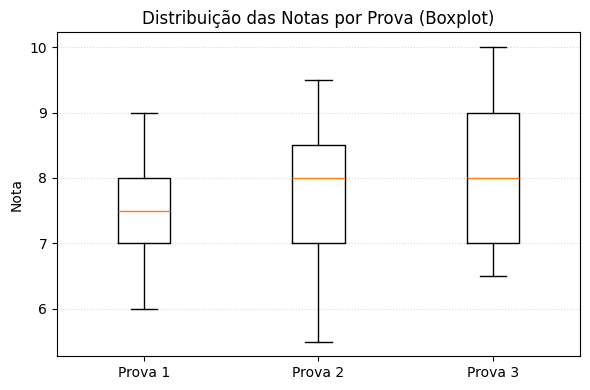

In [4]:
'''Abaixo vai um script único e autocontido que:

Simula um CSV com notas (notas_alunos.csv),

Lê o CSV com pandas,

Calcula a média por aluno,

Gera 4 gráficos (média por aluno, barras agrupadas por prova, evolução em linhas, boxplot).

Você pode colar tudo em um arquivo analise_notas.py e executar com python analise_notas.py. (Funciona também em Jupyter, rodando célula por célula.)'''

# analise_notas.py
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 1) SIMULAR E SALVAR UM CSV (você não precisa ter o arquivo)
# =========================================================
dados = {
    "aluno": ["Ana", "João", "Maria", "Carlos", "Paula"],
    "prova1": [7.5, 6.0, 9.0, 8.0, 7.0],
    "prova2": [8.0, 5.5, 8.5, 7.0, 9.5],
    "prova3": [9.0, 7.0, 10.0, 6.5, 8.0],
}
df_csv = pd.DataFrame(dados)
csv_path = "notas_alunos.csv"
df_csv.to_csv(csv_path, index=False)
print(f"CSV simulado criado: {csv_path}\n")
print(df_csv, "\n")

# =========================================================
# 2) LER O CSV
# =========================================================
df = pd.read_csv(csv_path)

# =========================================================
# 3) CALCULAR A MÉDIA POR ALUNO
# =========================================================
df["media"] = df[["prova1", "prova2", "prova3"]].mean(axis=1)
print("Com médias calculadas:\n", df, "\n")

# =========================================================
# 4) GRÁFICOS
# (use plt.savefig('arquivo.png') se quiser salvar)
# =========================================================

# 4.1) Barras: média por aluno
plt.figure(figsize=(7, 4))
plt.bar(df["aluno"], df["media"])
plt.title("Média por Aluno")
plt.xlabel("Aluno")
plt.ylabel("Média")
plt.grid(axis="y", linestyle=":", alpha=0.5)
plt.tight_layout()
# plt.savefig("grafico_media_por_aluno.png", dpi=150)


# 4.2) Barras agrupadas: notas por prova (lado a lado)
plt.figure(figsize=(8, 4))
largura = 0.25
x = range(len(df))
plt.bar([p - largura for p in x], df["prova1"], width=largura, label="Prova 1")
plt.bar(x,                         df["prova2"], width=largura, label="Prova 2")
plt.bar([p + largura for p in x], df["prova3"], width=largura, label="Prova 3")
plt.xticks(list(x), df["aluno"])
plt.ylabel("Nota")
plt.title("Notas por Prova (Agrupadas por Aluno)")
plt.legend()
plt.grid(axis="y", linestyle=":", alpha=0.5)
plt.tight_layout()
# plt.savefig("grafico_notas_agrupadas.png", dpi=150)

# 4.3) Linhas: evolução das notas por aluno
plt.figure(figsize=(8, 4))
provas = ["prova1", "prova2", "prova3"]
x = range(1, 4)
for _, linha in df.iterrows():
    plt.plot(x, [linha[p] for p in provas], marker="o", label=linha["aluno"])
plt.xticks(x, ["Prova 1", "Prova 2", "Prova 3"])
plt.ylabel("Nota")
plt.title("Evolução das Notas por Prova")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.5)
plt.tight_layout()
# plt.savefig("grafico_evolucao_linhas.png", dpi=150)


# 4.4) Boxplot: distribuição por prova
plt.figure(figsize=(6, 4))
plt.boxplot([df["prova1"], df["prova2"], df["prova3"]], labels=["Prova 1", "Prova 2", "Prova 3"])
plt.ylabel("Nota")
plt.title("Distribuição das Notas por Prova (Boxplot)")
plt.grid(axis="y", linestyle=":", alpha=0.5)
plt.tight_layout()
# plt.savefig("grafico_boxplot.png", dpi=150)
plt.show()


In [ ]:
'''Observações rápidas

Sem dependências extras: apenas pandas e matplotlib.

Para salvar as figuras, descomente as linhas com plt.savefig(...).

Para ajustar os valores do CSV simulado, edite o dicionário dados.'''

In [ ]:
'''
Exemplo 2 de Análise e Visualização

Aqui está um código em Python que lê um CSV externo (o arquivo contém os dados abaixo),
calcula algumas estatísticas simples (ex.: idade média) e gera gráficos com matplotlib e pandas:

Nome,Idade,Cidade
Ana,30,São Paulo
Carlos,25,Rio de Janeiro
Beatriz,28,Belo Horizonte

Este CSV e é bem simples, com apenas 3 colunas:

Nome (objeto/string)

Idade (inteiro)

Cidade (objeto/string)

E contém 3 registros: Ana, Carlos e Beatriz.'''

import pandas as pd
import matplotlib.pyplot as plt

# Ler o CSV real
'''o Google Colab executa em um ambiente de nuvem e não tem acesso direto ao sistema de arquivos do seu computador local
 Para usar o arquivo no Colab, você precisará fazer upload dele para o ambiente de execução do Colab.
 Existem algumas maneiras de fazer isso:

  Usar o painel "Arquivos": No painel esquerdo do Colab, clique no ícone de pasta (Arquivos).
  Lá, você pode arrastar e soltar seu arquivo CSV ou usar o botão "Fazer upload para o armazenamento da sessão"
  para selecionar o arquivo no seu computador. O arquivo estará disponível no caminho /content/.
  Montar o Google Drive: Se o arquivo estiver no seu Google Drive, você pode montar seu Drive no Colab e acessar
  o arquivo diretamente de lá. Para fazer isso, você pode usar o seguinte código em uma célula:

    from google.colab import drive
    drive.mount('/content/drive')

  Após executar esta célula e seguir as instruções para autenticar, seu Google Drive estará acessível
  em /content/drive/. Você poderá então usar o caminho completo para o arquivo no seu Drive
  (por exemplo, /content/drive/My Drive/sua_pasta/curso_Python_DataScience_ExemploCSV.csv).

  Depois de fazer o upload ou montar seu Drive, você poderá usar o caminho correto
  (por exemplo, /content/curso_Python_DataScience_ExemploCSV.csv ou o caminho no seu Drive) na função pd.read_csv().'''

df = pd.read_csv("/content/curso_Python_DataScience_ExemploCSV.csv")

# Mostrar o DataFrame
print("Dados carregados:\n", df)

# Estatística simples: idade média
print("\nIdade média:", df["Idade"].mean())

# --- Gráfico 1: Barras com idades ---
plt.figure(figsize=(6,4))
plt.bar(df["Nome"], df["Idade"], color="skyblue")
plt.title("Idade dos Funcionários")
plt.xlabel("Nome")
plt.ylabel("Idade")
plt.grid(axis="y", linestyle=":", alpha=0.6)
plt.show()

# --- Gráfico 2: Pizza com distribuição por cidade ---
plt.figure(figsize=(6,6))
df["Cidade"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["lightcoral","lightgreen","lightblue"])
plt.ylabel("")  # remove o label da esquerda
plt.title("Distribuição por Cidade")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/curso_Python_DataScience_ExemploCSV.csv'

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Dados carregados:
       Nome  Idade          Cidade
0      Ana     30       São Paulo
1   Carlos     25  Rio de Janeiro
2  Beatriz     28  Belo Horizonte

Idade média: 27.666666666666668


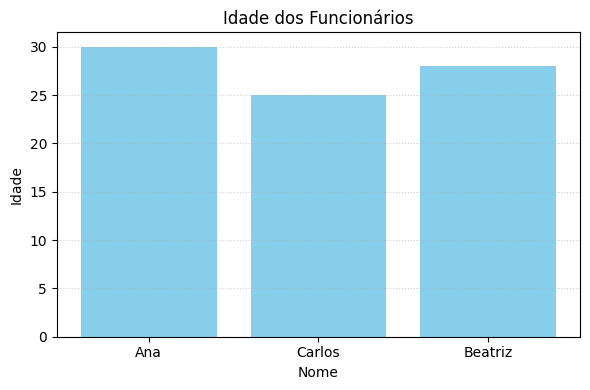

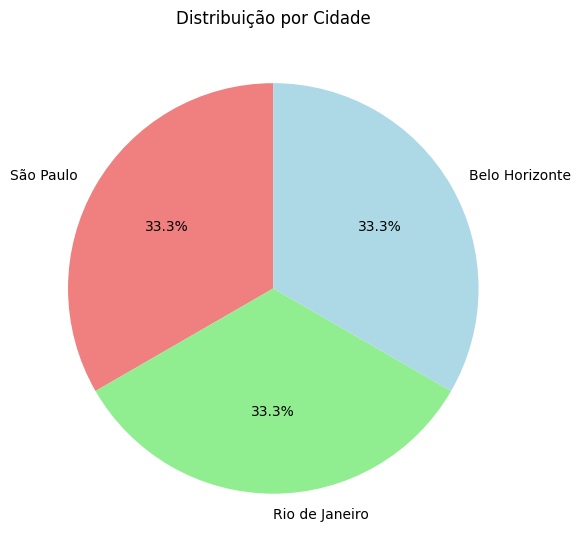

'\nO primeiro gráfico (idades_funcionarios.png) mostra as idades em barras.\n\nO segundo gráfico (distribuicao_cidade.png) mostra a pizza da distribuição das cidades.\n\nOs arquivos .png ficam salvos na mesma pasta do script Python.\n'

In [3]:
'''
Vamos adaptar o código para que, além de mostrar os gráficos na tela, ele também os salve automaticamente em arquivos .png.
Assim você poderá reutilizar em relatórios, apresentações ou documentos.'''

import pandas as pd
import matplotlib.pyplot as plt


# Ler o CSV real
df = pd.read_csv("/content/drive/My Drive/exemplo.csv")

# Mostrar o DataFrame
print("Dados carregados:\n", df)

# Estatística simples: idade média
print("\nIdade média:", df["Idade"].mean())

# --- Gráfico 1: Barras com idades ---
plt.figure(figsize=(6,4))
plt.bar(df["Nome"], df["Idade"], color="skyblue")
plt.title("Idade dos Funcionários")
plt.xlabel("Nome")
plt.ylabel("Idade")
plt.grid(axis="y", linestyle=":", alpha=0.6)
plt.tight_layout()
plt.savefig("/content/idades_funcionarios.png", dpi=150)  # SALVAR
#plt.show()

# --- Gráfico 2: Pizza com distribuição por cidade ---
plt.figure(figsize=(6,6))
df["Cidade"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightcoral","lightgreen","lightblue"]
)
plt.ylabel("")  # remove o label lateral
plt.title("Distribuição por Cidade")
plt.tight_layout()
plt.savefig("/content/distribuicao_cidade.png", dpi=150)  # SALVAR
plt.show()
print("")
'''
O primeiro gráfico (idades_funcionarios.png) mostra as idades em barras.

O segundo gráfico (distribuicao_cidade.png) mostra a pizza da distribuição das cidades.

Os arquivos .png ficam salvos na mesma pasta do script Python.
'''

In [7]:
'''
Podemos ainda gerar um relatório em PDF, com os dados e as imagens dos gráficos:
'''

!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00


In [9]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ler o CSV
csv_path = "/content/exemplo.csv"
try:
    df = pd.read_csv(csv_path)
    print("Dados carregados:\n", df)
except FileNotFoundError:
    print(f"Erro: O arquivo {csv_path} não foi encontrado.")
    exit()

# Estatística simples: idade média
idade_media = df["Idade"].mean()
print(f"\nIdade média: {idade_media}")

# --- Gerar gráficos e salvar temporariamente como PNG ---
def save_plot_to_png(fig, filename):
    """Salva a figura matplotlib em um arquivo PNG temporário."""
    fig.savefig(filename, dpi=150)
    plt.close(fig) # Fecha a figura para liberar memória

# Gráfico 1: Barras com idades
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.bar(df["Nome"], df["Idade"], color="skyblue")
ax1.set_title("Idade dos Funcionários")
ax1.set_xlabel("Nome")
ax1.set_ylabel("Idade")
ax1.grid(axis="y", linestyle=":", alpha=0.6)
plt.tight_layout()
png_idade = "/tmp/idades_funcionarios.png"
save_plot_to_png(fig1, png_idade)


# Gráfico 2: Pizza com distribuição por cidade
fig2, ax2 = plt.subplots(figsize=(6,6))
df["Cidade"].value_counts().plot.pie(
    ax=ax2,
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightcoral","lightgreen","lightblue"]
)
ax2.set_ylabel("")  # remove o label lateral
ax2.set_title("Distribuição por Cidade")
plt.tight_layout()
png_cidade = "/tmp/distribuicao_cidade.png"
save_plot_to_png(fig2, png_cidade)


# --- Gerar PDF ---
pdf_path = "/content/relatorio_analise.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)
width, height = letter

# Título do relatório
c.drawString(100, height - 50, "Relatório de Análise de Dados")

# Incluir dados do DataFrame
c.drawString(100, height - 100, "Dados Originais:")
df_string = df.to_string()
textobject = c.beginText(100, height - 120)
textobject.setFont("Times-Roman", 10)
# Dividir o texto em linhas para caber na página
for line in df_string.split('\n'):
    textobject.textLine(line)
c.drawText(textobject)

# Pular para a próxima página para os gráficos (se necessário)
c.showPage()
c.drawString(100, height - 50, "Gráficos da Análise")

# Incluir Gráfico 1 (Idades)
if os.path.exists(png_idade):
    try:
        img_idade = ImageReader(png_idade)
        img_width, img_height = img_idade.getSize()
        aspect = img_height / float(img_width)
        c.drawImage(img_idade, 100, height - 350, width=400, height=400 * aspect)
    except Exception as e:
        c.drawString(100, height - 200, f"Erro ao carregar imagem {png_idade}: {e}")

# Pular para a próxima página para o próximo gráfico (se necessário)
c.showPage()

# Incluir Gráfico 2 (Distribuição por Cidade)
if os.path.exists(png_cidade):
     try:
        img_cidade = ImageReader(png_cidade)
        img_width, img_height = img_cidade.getSize()
        aspect = img_height / float(img_width)
        c.drawImage(img_cidade, 100, height - 350, width=400, height=400 * aspect)
     except Exception as e:
        c.drawString(100, height - 200, f"Erro ao carregar imagem {png_cidade}: {e}")


# Salvar o PDF
c.save()

print(f"\nRelatório em PDF gerado com sucesso: {pdf_path}")
print("Você pode fazer o download deste arquivo no painel de Arquivos à esquerda.")

# Limpar arquivos PNG temporários
if os.path.exists(png_idade):
    os.remove(png_idade)
if os.path.exists(png_cidade):
    os.remove(png_cidade)

'''
Este código primeiro instala a biblioteca reportlab, depois lê o arquivo CSV, calcula a idade média,
gera os dois gráficos e os salva temporariamente como arquivos PNG. Em seguida, ele cria um arquivo PDF,
adiciona um título, insere os dados do DataFrame e inclui as imagens dos gráficos. Finalmente, ele salva
o arquivo PDF no diretório /content e remove os arquivos PNG temporários.

Você pode executar este código em uma célula do Colab para gerar o relatório em PDF. Depois de executar,
o arquivo relatorio_analise.pdf estará disponível para download no painel de arquivos.
'''

Dados carregados:
       Nome  Idade          Cidade
0      Ana     30       São Paulo
1   Carlos     25  Rio de Janeiro
2  Beatriz     28  Belo Horizonte

Idade média: 27.666666666666668

Relatório em PDF gerado com sucesso: /content/relatorio_analise.pdf
Você pode fazer o download deste arquivo no painel de Arquivos à esquerda.


'\nEste código primeiro instala a biblioteca reportlab, depois lê o arquivo CSV, calcula a idade média,\ngera os dois gráficos e os salva temporariamente como arquivos PNG. Em seguida, ele cria um arquivo PDF,\nadiciona um título, insere os dados do DataFrame e inclui as imagens dos gráficos. Finalmente, ele salva\no arquivo PDF no diretório /content e remove os arquivos PNG temporários.\n\nVocê pode executar este código em uma célula do Colab para gerar o relatório em PDF. Depois de executar,\no arquivo relatorio_analise.pdf estará disponível para download no painel de arquivos.\n'

In [ ]:
'''
Trabalhando com Excel e criando Dataframes com Python
'''

import pandas as pd

# Criar um DataFrame de exemplo
dados_exemplo = {
    "Coluna A": [1, 2, 3, 4, 5],
    "Coluna B": ["Alpha", "Beta", "Gamma", "Delta", "Epsilon"],
    "Coluna C": [10.5, 20.1, 30.9, 40.2, 50.7]
}
df_exemplo = pd.DataFrame(dados_exemplo)

# Definir o nome do arquivo Excel
nome_arquivo_excel = "arquivo_exemplo.xlsx"

# Salvar o DataFrame como um arquivo Excel
df_exemplo.to_excel(nome_arquivo_excel, index=False)

print(f"Arquivo '{nome_arquivo_excel}' criado com sucesso em /content/")
print("Você pode fazer o download deste arquivo no painel de Arquivos à esquerda.")

Arquivo 'arquivo_exemplo.xlsx' criado com sucesso em /content/
Você pode fazer o download deste arquivo no painel de Arquivos à esquerda.


In [ ]:
'''
Para ler um arquivo Excel em vez de um CSV, você precisa usar a função pd.read_excel().
Além disso, pode ser necessário instalar a biblioteca openpyxl para que o pandas possa ler arquivos .xlsx.'''

import pandas as pd

# Especifique o caminho para o seu arquivo Excel
# Se o arquivo estiver no seu Google Drive montado, o caminho será algo como:
# excel_path = '/content/drive/My Drive/sua_pasta/seu_arquivo.xlsx'

# Se você fez upload direto para o Colab, o caminho será:
excel_path = '/content/arquivo_exemplo.xlsx' # Substitua 'seu_arquivo.xlsx' pelo nome do seu arquivo

try:
    # Leia o arquivo Excel
    df = pd.read_excel(excel_path)

    # Mostre o DataFrame lido
    print("Dados carregados do Excel:")
    print(df.head()) # Mostra as primeiras linhas do DataFrame

except FileNotFoundError:
    print(f"Erro: O arquivo {excel_path} não foi encontrado. Certifique-se de que o caminho está correto e o arquivo foi enviado/montado no Colab.")
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo Excel: {e}")

'''
Lembre-se de substituir '/content/seu_arquivo.xlsx' pelo caminho real onde seu arquivo Excel está localizado no ambiente
do Google Colab. Se você tiver várias abas no seu arquivo Excel e quiser ler uma específica, pode adicionar o argumento
"sheet_name='NomeDaAba'" na função pd.read_excel(). Por padrão, ele lê a primeira aba.
'''



Dados carregados do Excel:
   Coluna A Coluna B  Coluna C
0         1    Alpha      10.5
1         2     Beta      20.1
2         3    Gamma      30.9
3         4    Delta      40.2
4         5  Epsilon      50.7


'\nLembre-se de substituir \'/content/seu_arquivo.xlsx\' pelo caminho real onde seu arquivo Excel está localizado no ambiente\ndo Google Colab. Se você tiver várias abas no seu arquivo Excel e quiser ler uma específica, pode adicionar o argumento\n"sheet_name=\'NomeDaAba\'" na função pd.read_excel(). Por padrão, ele lê a primeira aba.\n'

Dados carregados do Excel:
   Coluna A Coluna B  Coluna C
0         1    Alpha      10.5
1         2     Beta      20.1
2         3    Gamma      30.9
3         4    Delta      40.2
4         5  Epsilon      50.7


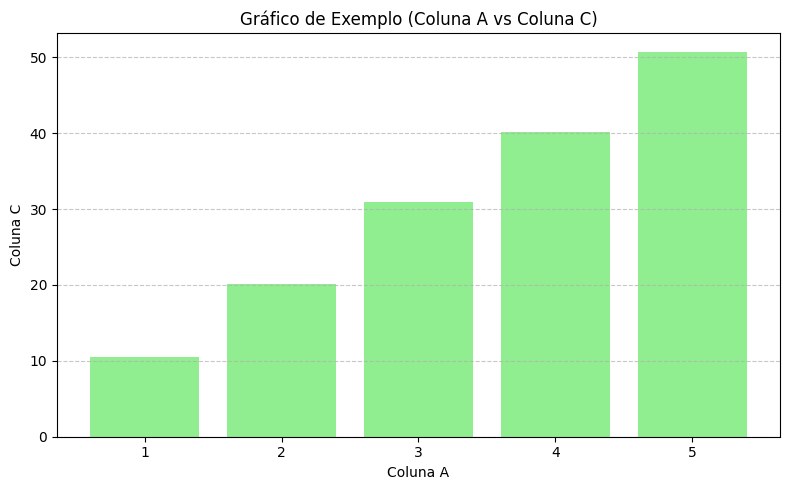

'\nLembre-se de substituir \'/content/drive/My Drive/sua_pasta/seu_arquivo.xlsx\' pelo caminho real onde seu arquivo Excel\nestá localizado no seu Google Drive. Se você tiver várias abas no seu arquivo Excel e quiser ler uma específica,\npode adicionar o argumento "sheet_name=\'NomeDaAba\'" na função pd.read_excel(). Por padrão, ele lê a primeira aba.\nAdapte o código do gráfico para o tipo de visualização que melhor representa seus dados.\n'

In [ ]:
'''
Para ler um arquivo Excel em vez de um CSV, você precisa usar a função pd.read_excel().
Além disso, pode ser necessário instalar a biblioteca openpyxl para que o pandas possa ler arquivos .xlsx.'''

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Especifique o caminho para o seu arquivo Excel no Google Drive montado
# Substitua 'sua_pasta/seu_arquivo.xlsx' pelo caminho real do seu arquivo no Drive
#drive.mount('/content/drive')
excel_path = '/content/drive/My Drive/arquivo_exemplo.xlsx' # **ATENÇÃO:** Substitua pelo caminho correto!

try:
    # Leia o arquivo Excel
    df = pd.read_excel(excel_path)

    # Mostre o DataFrame lido
    print("Dados carregados do Excel:")
    print(df.head()) # Mostra as primeiras linhas do DataFrame

    # --- Gerar um gráfico (exemplo: barras) ---
    # Adapte o tipo de gráfico e as colunas conforme seus dados
    plt.figure(figsize=(8, 5))
    plt.bar(df["Coluna A"], df["Coluna C"], color='lightgreen') # Exemplo com Coluna A e Coluna C
    plt.title("Gráfico de Exemplo (Coluna A vs Coluna C)")
    plt.xlabel("Coluna A")
    plt.ylabel("Coluna C")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print(f"Erro: O arquivo {excel_path} não foi encontrado. Certifique-se de que o caminho está correto e o arquivo foi enviado/montado no Colab.")
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo Excel ou gerar o gráfico: {e}")

'''
Lembre-se de substituir '/content/drive/My Drive/sua_pasta/seu_arquivo.xlsx' pelo caminho real onde seu arquivo Excel
está localizado no seu Google Drive. Se você tiver várias abas no seu arquivo Excel e quiser ler uma específica,
pode adicionar o argumento "sheet_name='NomeDaAba'" na função pd.read_excel(). Por padrão, ele lê a primeira aba.
Adapte o código do gráfico para o tipo de visualização que melhor representa seus dados.
'''

Após a execução da célula acima, você verá o arquivo `arquivo_exemplo.xlsx` no painel de arquivos do Google Colab (o ícone de pasta no lado esquerdo).

Para fazer o download, clique com o botão direito no nome do arquivo e selecione "Download".